# Problem Statement:

A Microfinance Institution (MFI) is an organization that offers financial services to low income populations. MFS becomes very useful when targeting especially the unbanked poor families living in remote areas with not much sources of income. The Microfinance services (MFS) provided by MFI are Group Loans, Agricultural Loans, Individual Business Loans and so on. 
Many microfinance institutions (MFI), experts and donors are supporting the idea of using mobile financial services (MFS) which they feel are more convenient and efficient, and cost saving, than the traditional high-touch model used since long for the purpose of delivering microfinance services. Though, the MFI industry is primarily focusing on low income families and are very useful in such areas, the implementation of MFS has been uneven with both significant challenges and successes.
Today, microfinance is widely accepted as a poverty-reduction tool, representing $70 billion in outstanding loans and a global outreach of 200 million clients.
We are working with one such client that is in Telecom Industry. They are a fixed wireless telecommunications network provider. They have launched various products and have developed its business and organization based on the budget operator model, offering better products at Lower Prices to all value conscious customers through a strategy of disruptive innovation that focuses on the subscriber. 
They understand the importance of communication and how it affects a person’s life, thus, focusing on providing their services and products to low income families and poor customers that can help them in the need of hour. 
They are collaborating with an MFI to provide micro-credit on mobile balances to be paid back in 5 days. The Consumer is believed to be defaulter if he deviates from the path of paying back the loaned amount within the time duration of 5 days. For the loan amount of 5 (in Indonesian Rupiah), payback amount should be6(in Indonesian Rupiah), while, for the loan amount of 10(in Indonesian Rupiah), the payback amount should be 12(in Indonesian Rupiah). 
The sample data is provided to us from our client database. It is hereby given to you for this exercise. In order to improve the selection of customers for the credit, the client wants some predictions that could help them in further investment and improvement in selection of customers. 


In [5]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

In [6]:
pd.set_option("display.max_rows",None)

In [7]:
from google.colab import drive
drive.mount('/content/gdrive')

Drive already mounted at /content/gdrive; to attempt to forcibly remount, call drive.mount("/content/gdrive", force_remount=True).


In [9]:
from google.colab import files

uploaded = files.upload()

Saving Data file.csv to Data file (2).csv


In [11]:
import io
micro = pd.read_csv(io.BytesIO(uploaded['Data file.csv']))

In [12]:
# load the Data
#micro=pd.read_csv(r"E:\Data Science\Flip robo Project\Micro Credit Project\Data file.csv")
#micro.head()

In [13]:
micro.shape

(209593, 37)

In [14]:
micro.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 209593 entries, 0 to 209592
Data columns (total 37 columns):
 #   Column                Non-Null Count   Dtype  
---  ------                --------------   -----  
 0   Unnamed: 0            209593 non-null  int64  
 1   label                 209593 non-null  int64  
 2   msisdn                209593 non-null  object 
 3   aon                   209593 non-null  float64
 4   daily_decr30          209593 non-null  float64
 5   daily_decr90          209593 non-null  float64
 6   rental30              209593 non-null  float64
 7   rental90              209593 non-null  float64
 8   last_rech_date_ma     209593 non-null  float64
 9   last_rech_date_da     209593 non-null  float64
 10  last_rech_amt_ma      209593 non-null  int64  
 11  cnt_ma_rech30         209593 non-null  int64  
 12  fr_ma_rech30          209593 non-null  float64
 13  sumamnt_ma_rech30     209593 non-null  float64
 14  medianamnt_ma_rech30  209593 non-null  float64
 15  

In [15]:
micro.isna().sum()

Unnamed: 0              0
label                   0
msisdn                  0
aon                     0
daily_decr30            0
daily_decr90            0
rental30                0
rental90                0
last_rech_date_ma       0
last_rech_date_da       0
last_rech_amt_ma        0
cnt_ma_rech30           0
fr_ma_rech30            0
sumamnt_ma_rech30       0
medianamnt_ma_rech30    0
medianmarechprebal30    0
cnt_ma_rech90           0
fr_ma_rech90            0
sumamnt_ma_rech90       0
medianamnt_ma_rech90    0
medianmarechprebal90    0
cnt_da_rech30           0
fr_da_rech30            0
cnt_da_rech90           0
fr_da_rech90            0
cnt_loans30             0
amnt_loans30            0
maxamnt_loans30         0
medianamnt_loans30      0
cnt_loans90             0
amnt_loans90            0
maxamnt_loans90         0
medianamnt_loans90      0
payback30               0
payback90               0
pcircle                 0
pdate                   0
dtype: int64

In [16]:
#here we drop two unusefull columns such as "Unnamed:0" and "msisdn" which not usefull for predicting label

In [17]:
micro=micro.drop(columns=['Unnamed: 0','msisdn'],axis=1)

In [18]:
micro.shape

(209593, 35)

In [19]:
cat_features = micro.select_dtypes(include = 'object').columns
print("Categorical features are :",cat_features),len(cat_features)

Categorical features are : Index(['pcircle', 'pdate'], dtype='object')


(None, 2)

In [20]:
num_features = micro.select_dtypes(exclude = 'object').columns
print("Numerical features are :",num_features),len(num_features)

Numerical features are : Index(['label', 'aon', 'daily_decr30', 'daily_decr90', 'rental30', 'rental90',
       'last_rech_date_ma', 'last_rech_date_da', 'last_rech_amt_ma',
       'cnt_ma_rech30', 'fr_ma_rech30', 'sumamnt_ma_rech30',
       'medianamnt_ma_rech30', 'medianmarechprebal30', 'cnt_ma_rech90',
       'fr_ma_rech90', 'sumamnt_ma_rech90', 'medianamnt_ma_rech90',
       'medianmarechprebal90', 'cnt_da_rech30', 'fr_da_rech30',
       'cnt_da_rech90', 'fr_da_rech90', 'cnt_loans30', 'amnt_loans30',
       'maxamnt_loans30', 'medianamnt_loans30', 'cnt_loans90', 'amnt_loans90',
       'maxamnt_loans90', 'medianamnt_loans90', 'payback30', 'payback90'],
      dtype='object')


(None, 33)

# Univariate Analysis

In [21]:
micro['pcircle'].value_counts()

UPW    209593
Name: pcircle, dtype: int64

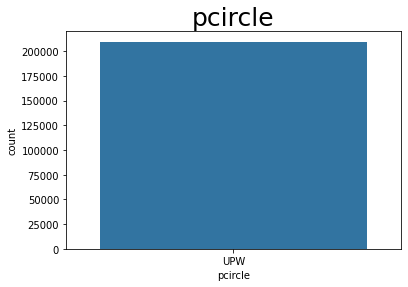

In [22]:
sns.countplot(micro['pcircle'])
plt.title('pcircle',fontsize=25)
plt.show()

In [23]:
micro['pdate'].value_counts()

2016-07-04    3150
2016-07-05    3127
2016-07-07    3116
2016-06-20    3099
2016-06-17    3082
2016-07-06    3041
2016-06-15    3033
2016-07-11    3020
2016-07-10    3014
2016-06-27    2999
2016-06-18    2972
2016-06-23    2964
2016-07-12    2962
2016-06-25    2956
2016-07-01    2954
2016-07-13    2953
2016-06-14    2945
2016-06-12    2936
2016-07-18    2926
2016-07-09    2922
2016-07-14    2920
2016-06-11    2915
2016-07-02    2910
2016-07-15    2908
2016-06-22    2906
2016-07-03    2905
2016-06-26    2901
2016-06-13    2897
2016-07-19    2892
2016-07-08    2891
2016-06-21    2890
2016-07-17    2873
2016-06-10    2858
2016-07-23    2852
2016-07-22    2847
2016-07-20    2842
2016-07-16    2839
2016-06-19    2833
2016-06-29    2832
2016-06-16    2824
2016-06-30    2822
2016-06-24    2785
2016-07-21    2750
2016-06-28    2664
2016-06-06    2631
2016-06-09    2604
2016-06-08    2580
2016-06-02    2577
2016-06-05    2564
2016-06-01    2535
2016-06-07    2502
2016-06-03    2489
2016-08-04  

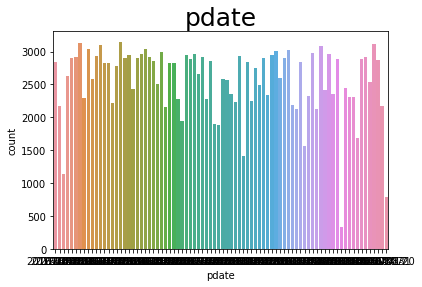

In [24]:
sns.countplot(micro['pdate'])
plt.title('pdate',fontsize=25)
plt.show()

In [25]:
micro['label'].value_counts()

1    183431
0     26162
Name: label, dtype: int64

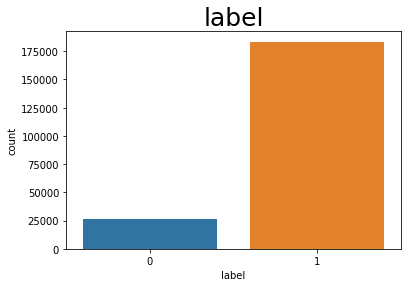

In [26]:
sns.countplot(micro['label'])
plt.title('label',fontsize=25)
plt.show()

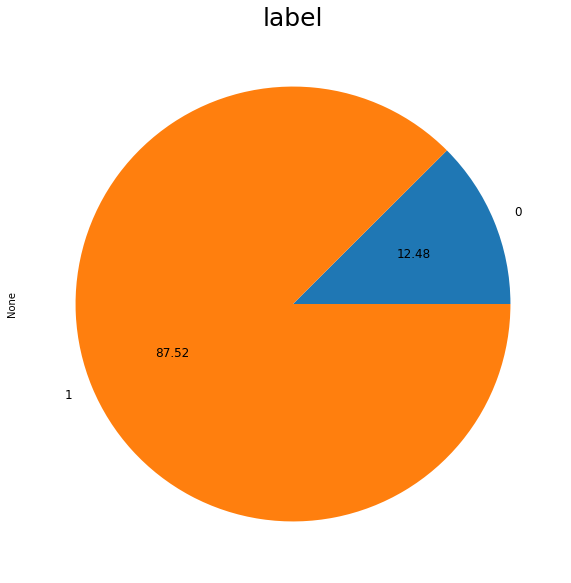

In [27]:
plt.figure(figsize=(15,10))
micro.groupby('label').size().plot(kind='pie', autopct='%.2f',fontsize=12)
plt.title('label',fontsize=25)
plt.show()

# By observing Label 0 and 1 , we clearly conclude that output is imbalanced. we need to apply oversampling or Undersampling here

In [28]:
micro['maxamnt_loans90'].value_counts()

6     180945
12     26605
0       2043
Name: maxamnt_loans90, dtype: int64

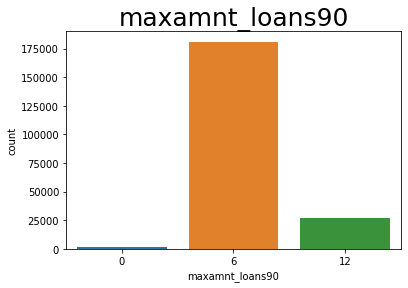

In [29]:
sns.countplot(micro['maxamnt_loans90'])
plt.title('maxamnt_loans90',fontsize=25)
plt.show()

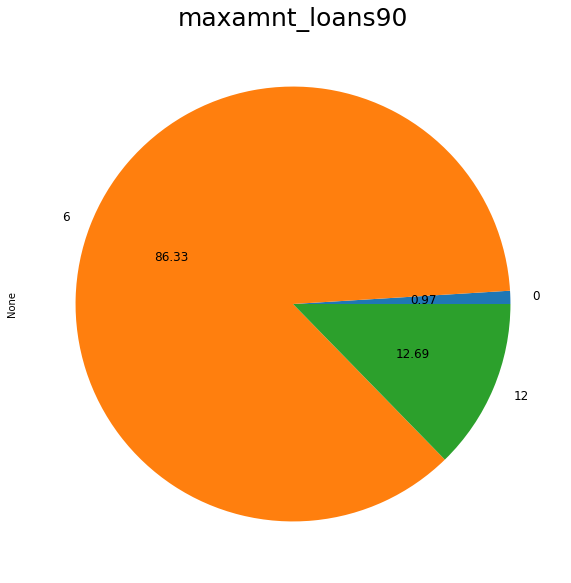

In [30]:
plt.figure(figsize=(15,10))
micro.groupby('maxamnt_loans90').size().plot(kind='pie', autopct='%.2f',fontsize=12)
plt.title('maxamnt_loans90',fontsize=25)
plt.show()

In [31]:
micro['medianamnt_loans90'].value_counts()

0.0    197424
1.0      6172
0.5      5668
2.0       307
1.5        19
3.0         3
Name: medianamnt_loans90, dtype: int64

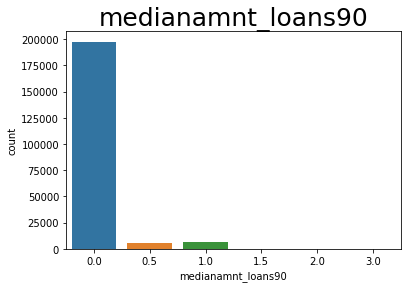

In [32]:
sns.countplot(micro['medianamnt_loans90'])
plt.title('medianamnt_loans90',fontsize=25)
plt.show()

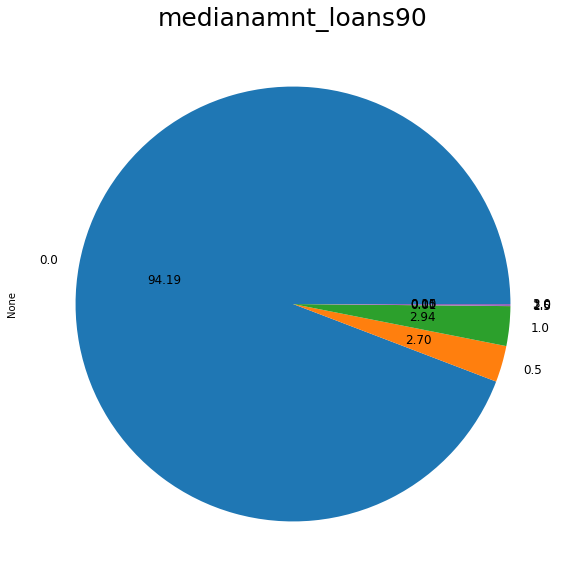

In [33]:
plt.figure(figsize=(15,10))
micro.groupby('medianamnt_loans90').size().plot(kind='pie', autopct='%.2f',fontsize=12)
plt.title('medianamnt_loans90',fontsize=25)
plt.show()

In [34]:
micro['medianamnt_loans90'].value_counts()

0.0    197424
1.0      6172
0.5      5668
2.0       307
1.5        19
3.0         3
Name: medianamnt_loans90, dtype: int64

In [35]:
micro['cnt_da_rech90'].value_counts()

0     204226
1       4173
2        556
3        227
4        150
5         74
6         49
7         36
8         30
9         18
14        10
12         7
11         7
10         6
13         6
16         4
18         3
15         2
30         1
17         1
19         1
20         1
22         1
25         1
27         1
28         1
38         1
Name: cnt_da_rech90, dtype: int64

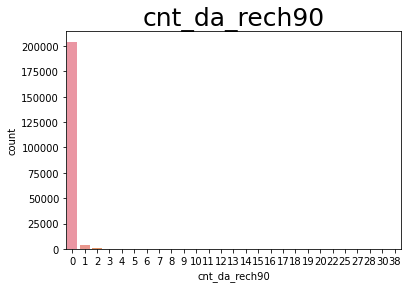

In [36]:

sns.countplot(micro['cnt_da_rech90'])
plt.title('cnt_da_rech90',fontsize=25)
plt.show()

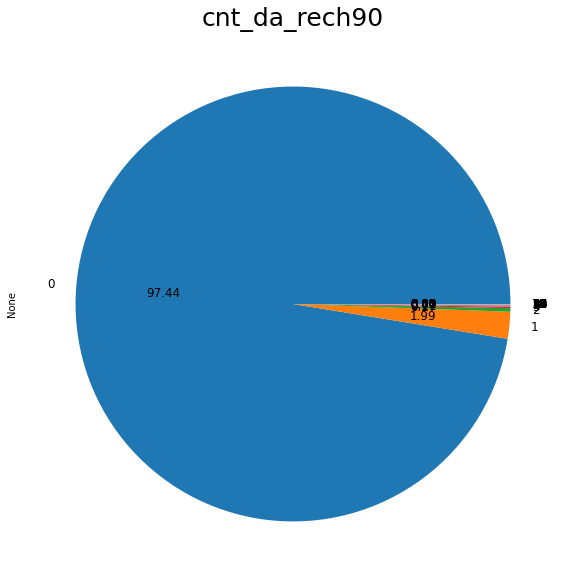

In [37]:
plt.figure(figsize=(15,10))
micro.groupby('cnt_da_rech90').size().plot(kind='pie', autopct='%.2f',fontsize=12)
plt.title('cnt_da_rech90',fontsize=25)
plt.show()

In [38]:
micro['fr_da_rech30'].value_counts()

0.000000         208014
3.000000             64
1.000000             55
2.000000             51
7.000000             47
4.000000             45
6.000000             38
5.000000             36
8.000000             34
10.000000            19
9.000000             19
11.000000            18
12.000000            16
14.000000            15
13.000000            15
15.000000            13
18.000000            11
16.000000             9
19.000000             8
17.000000             6
20.000000             6
23.000000             2
22.000000             2
21.000000             2
689217.968844         1
734218.096710         1
801876.264275         1
760565.757868         1
945977.343130         1
889897.143468         1
725104.930345         1
544990.897761         1
952690.165606         1
533002.607292         1
944024.936529         1
986962.254625         1
659987.398307         1
563456.423464         1
916806.621361         1
760185.522726         1
956693.090731         1
907274.247613   

In [39]:
micro['fr_da_rech30'].nunique()

1072

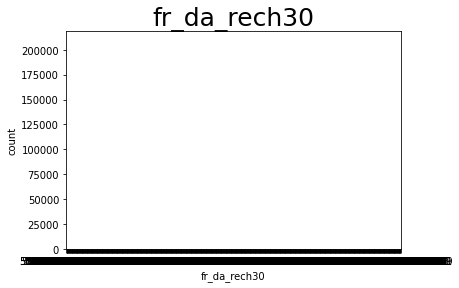

In [40]:
sns.countplot(micro['fr_da_rech30'])
plt.title('fr_da_rech30',fontsize=25)
plt.show()

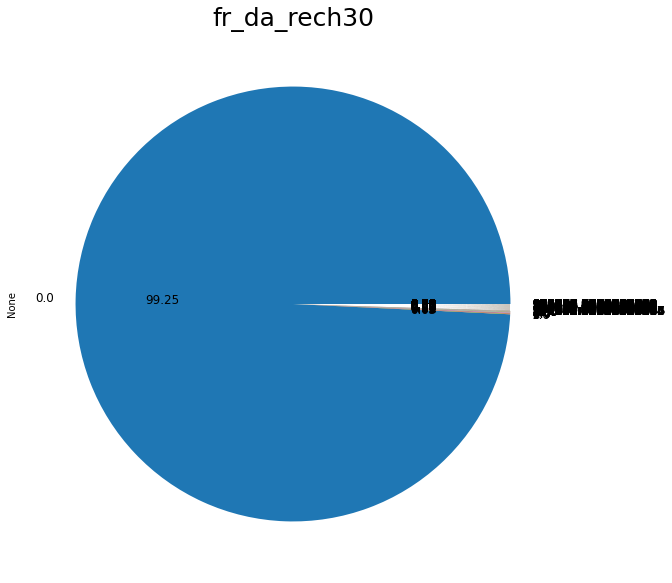

In [41]:
plt.figure(figsize=(15,10))
micro.groupby('fr_da_rech30').size().plot(kind='pie', autopct='%.2f',fontsize=12)
plt.title('fr_da_rech30',fontsize=25)
plt.show()

In [42]:
micro['fr_da_rech90'].value_counts()

0     208728
3         78
1         66
2         66
4         56
7         55
6         52
5         45
8         44
10        33
9         32
14        32
11        30
12        27
19        22
28        19
13        17
15        17
18        16
29        15
16        14
17        14
22        11
25        11
21        10
20         9
24         8
27         8
32         8
26         7
30         7
31         6
34         5
23         5
37         5
57         3
35         2
41         2
46         1
56         1
55         1
33         1
43         1
42         1
39         1
64         1
Name: fr_da_rech90, dtype: int64

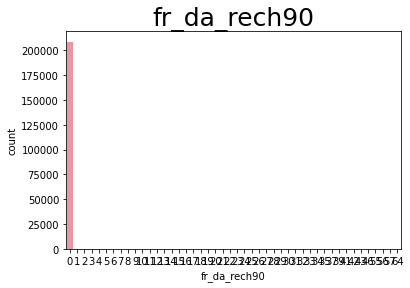

In [43]:
sns.countplot(micro['fr_da_rech90'])
plt.title('fr_da_rech90',fontsize=25)
plt.show()

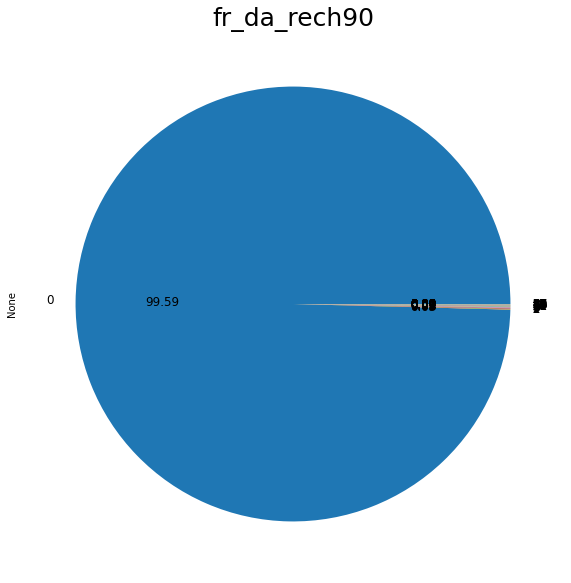

In [44]:
plt.figure(figsize=(15,10))
micro.groupby('fr_da_rech90').size().plot(kind='pie', autopct='%.2f',fontsize=12)
plt.title('fr_da_rech90',fontsize=25)
plt.show()

In [45]:
micro['last_rech_amt_ma'].value_counts()

1539     56297
770      41766
0        20995
773      19523
2309     16113
4048     10510
8000      9206
1547      7633
3178      6680
1924      4126
5787      3226
10000     2691
7526      2473
947       1257
11874      972
4917       906
173        811
2320       745
4067       576
3193       403
1720       333
1933       230
7400       225
5814       223
3467       183
2593       152
16000      151
12500      147
7560       124
777        105
1333        95
1554        93
4940        85
5214        80
11927       67
6960        54
9400        47
11000       45
4340        41
32000       32
17391       30
55000       28
790         17
11327       16
1580        11
11900       10
4047         6
954          5
1538         5
177          5
11004        4
769          3
15400        3
6222         3
21739        3
17467        3
7999         2
3466         2
1546         2
19130        2
946          2
1923         2
34783        1
15652        1
772          1
19913        1
10454     

In [46]:
micro['last_rech_amt_ma'].nunique()

70

In [47]:
micro['cnt_ma_rech30'].value_counts()

1      37238
2      31216
0      27979
3      25519
4      20258
5      15860
6      11945
7       9090
8       6924
9       5259
10      3989
11      3022
12      2357
13      1815
14      1412
15      1059
16       885
17       649
18       522
19       442
20       391
21       290
22       239
23       214
24       144
25       116
26       108
27        93
28        83
29        79
30        56
31        43
33        31
34        30
35        25
37        23
32        22
39        21
40        20
36        19
38        17
41        12
42         8
44         8
45         7
48         6
43         5
61         4
52         4
49         3
51         3
47         3
54         3
53         2
55         2
58         2
60         2
46         2
74         1
91         1
84         1
78         1
77         1
203        1
99         1
71         1
64         1
63         1
59         1
50         1
115        1
Name: cnt_ma_rech30, dtype: int64

In [48]:
micro['cnt_ma_rech30'].nunique()

71

In [49]:
micro['cnt_ma_rech90'].value_counts()

1      27898
2      24052
0      20950
3      20446
4      17329
5      14830
6      12428
7      10466
8       8819
9       7465
10      6317
11      5332
12      4662
13      3844
14      3399
15      2833
16      2382
17      1986
18      1805
19      1570
20      1334
21      1128
22      1016
23       814
24       750
25       631
26       550
27       510
28       453
29       379
30       357
31       286
32       284
33       233
35       199
34       198
37       143
39       137
36       136
38       130
40       110
41        87
42        85
43        70
46        65
45        63
44        54
49        47
48        42
47        38
51        35
50        35
54        30
52        25
55        22
56        21
53        20
63        19
57        18
58        16
59        16
61        13
60        13
70         9
64         9
65         9
67         9
68         9
62         8
74         8
69         8
72         7
80         7
71         6
81         6
66         6
82         6

In [50]:
micro['cnt_ma_rech90'].nunique()

110

In [51]:
micro['fr_ma_rech90'].value_counts()

0     65753
1     24373
2     19285
3     13192
4     10021
5      7484
6      6526
7      5834
8      5122
9      4278
10     3502
11     2980
12     2543
13     2197
32     2108
14     1997
34     1974
33     1876
15     1718
31     1658
16     1473
35     1310
17     1277
18     1163
30     1131
19     1096
20      934
40      892
41      860
21      846
42      816
22      777
36      762
43      701
39      689
23      662
24      638
44      627
25      573
26      530
38      520
45      519
27      487
28      446
46      445
29      438
47      408
48      366
49      327
37      298
50      286
52      251
51      241
53      212
54      199
56      188
55      168
57      146
58      128
60      101
59       95
69       93
62       86
70       85
63       85
61       82
68       80
64       77
66       73
65       71
67       67
74       49
71       46
72       44
73       32
77       31
76       29
75       27
78       15
79       15
82       10
85        9
83        8
86  

In [52]:
micro['fr_ma_rech90'].nunique()

89

In [53]:
micro['aon'].min()

-48.0

In [54]:
micro.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 209593 entries, 0 to 209592
Data columns (total 35 columns):
 #   Column                Non-Null Count   Dtype  
---  ------                --------------   -----  
 0   label                 209593 non-null  int64  
 1   aon                   209593 non-null  float64
 2   daily_decr30          209593 non-null  float64
 3   daily_decr90          209593 non-null  float64
 4   rental30              209593 non-null  float64
 5   rental90              209593 non-null  float64
 6   last_rech_date_ma     209593 non-null  float64
 7   last_rech_date_da     209593 non-null  float64
 8   last_rech_amt_ma      209593 non-null  int64  
 9   cnt_ma_rech30         209593 non-null  int64  
 10  fr_ma_rech30          209593 non-null  float64
 11  sumamnt_ma_rech30     209593 non-null  float64
 12  medianamnt_ma_rech30  209593 non-null  float64
 13  medianmarechprebal30  209593 non-null  float64
 14  cnt_ma_rech90         209593 non-null  int64  
 15  

In [55]:
micro['daily_decr30'].nunique()

147026

In [56]:
micro_num=micro.drop(columns=['pcircle', 'pdate','label'],axis=1)

In [57]:
micro_cat=micro.drop(columns=['aon', 'daily_decr30', 'daily_decr90', 'rental30', 'rental90',
       'last_rech_date_ma', 'last_rech_date_da', 'last_rech_amt_ma',
       'cnt_ma_rech30', 'fr_ma_rech30', 'sumamnt_ma_rech30',
       'medianamnt_ma_rech30', 'medianmarechprebal30', 'cnt_ma_rech90',
       'fr_ma_rech90', 'sumamnt_ma_rech90', 'medianamnt_ma_rech90',
       'medianmarechprebal90', 'cnt_da_rech30', 'fr_da_rech30',
       'cnt_da_rech90', 'fr_da_rech90', 'cnt_loans30', 'amnt_loans30',
       'maxamnt_loans30', 'medianamnt_loans30', 'cnt_loans90', 'amnt_loans90',
        'payback30', 'payback90','medianamnt_loans90','maxamnt_loans90'],axis=1)

In [58]:
micro_num.shape

(209593, 32)

In [59]:
micro_num.head()

aon  daily_decr30  daily_decr90  ...  medianamnt_loans90  payback30  payback90
0  272.0   3055.050000   3065.150000  ...                 0.0  29.000000  29.000000
1  712.0  12122.000000  12124.750000  ...                 0.0   0.000000   0.000000
2  535.0   1398.000000   1398.000000  ...                 0.0   0.000000   0.000000
3  241.0     21.228000     21.228000  ...                 0.0   0.000000   0.000000
4  947.0    150.619333    150.619333  ...                 0.0   2.333333   2.333333

[5 rows x 32 columns]

In [60]:
micro_cat.shape

(209593, 3)

# Univariate Analysis for Continous Feature

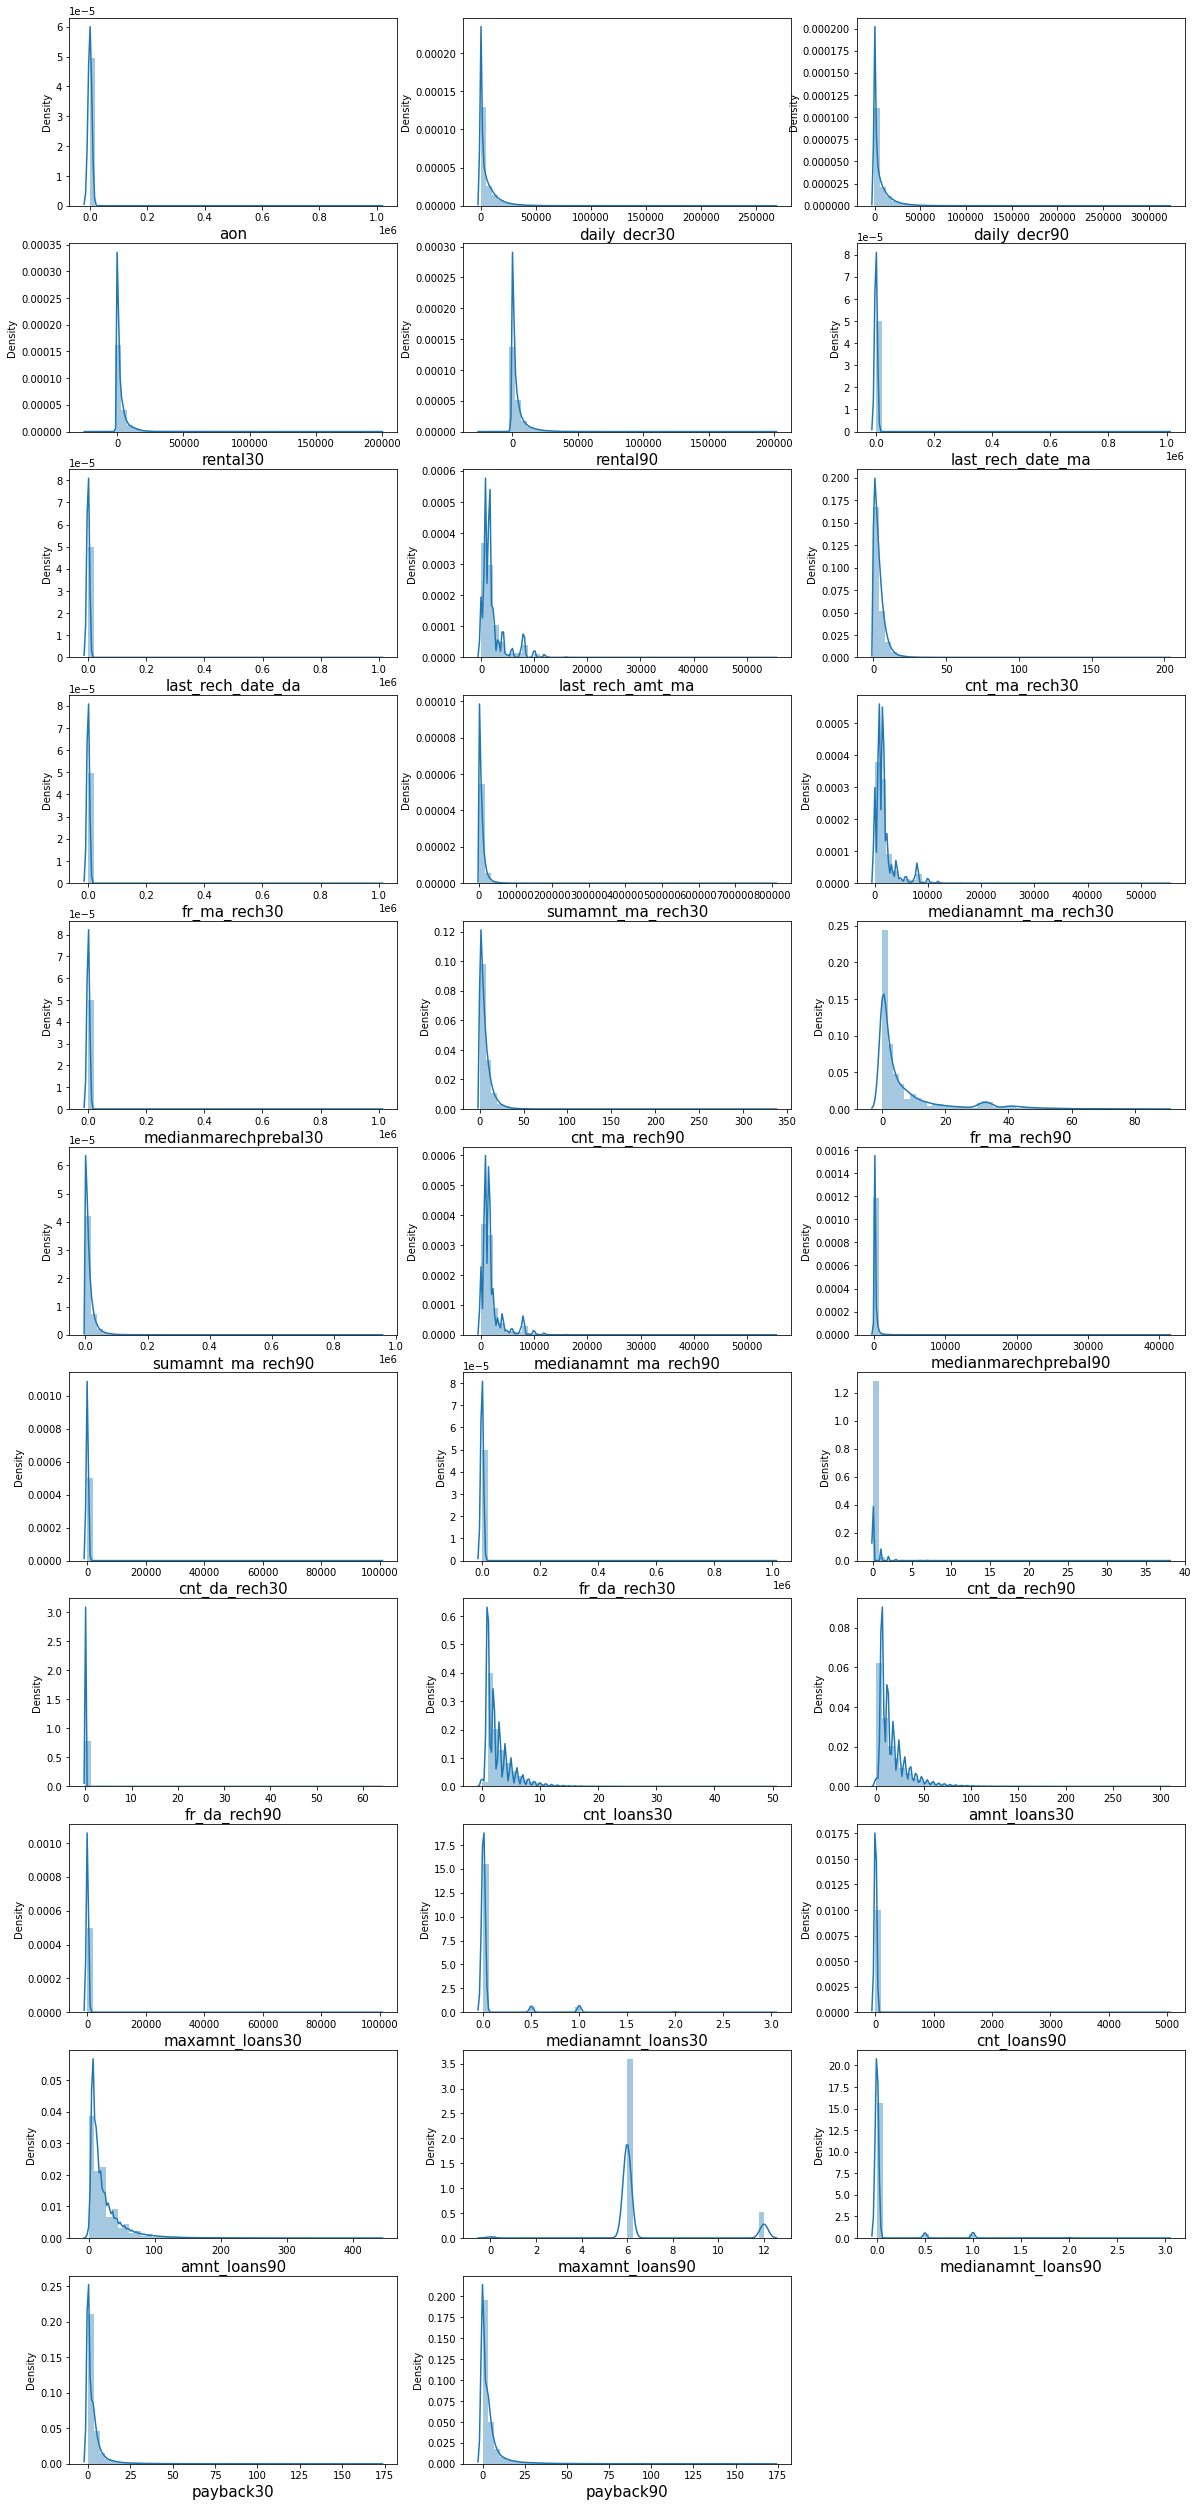

In [61]:
plt.figure(figsize=(20,45))   # here we give row and column wise dimension
plotnumber=1  # initially plotnumber is set to 1
for column in micro_num:  #  we pass every column of dataframe into for loop
    if plotnumber<=32: # maximmum plotnumber is 3
        plt.subplot(11,3,plotnumber) # we plot all distplot in 1row and in 3 columns
        ax=sns.distplot(micro_num[column]) # we plot distribution plot for every column
        plt.xlabel(column,fontsize=15)# assign column name to each x axis
    plotnumber+=1 # plotnumber is incremented by 1
plt.show() # display gra

In [64]:
# lets use z score to remove outliers
from scipy.stats import zscore # z score represent the number of  standard deviation with which value of observation differ than mean value
z=np.abs(zscore(micro_num))
micro_num1=micro_num[(z<5.6).all(axis=1)]  # z score with std deviation =3

In [65]:
micro_num1.shape

(192834, 32)

In [66]:
micro_num.shape

(209593, 32)

In [67]:
192834/209593

0.9200402685204181

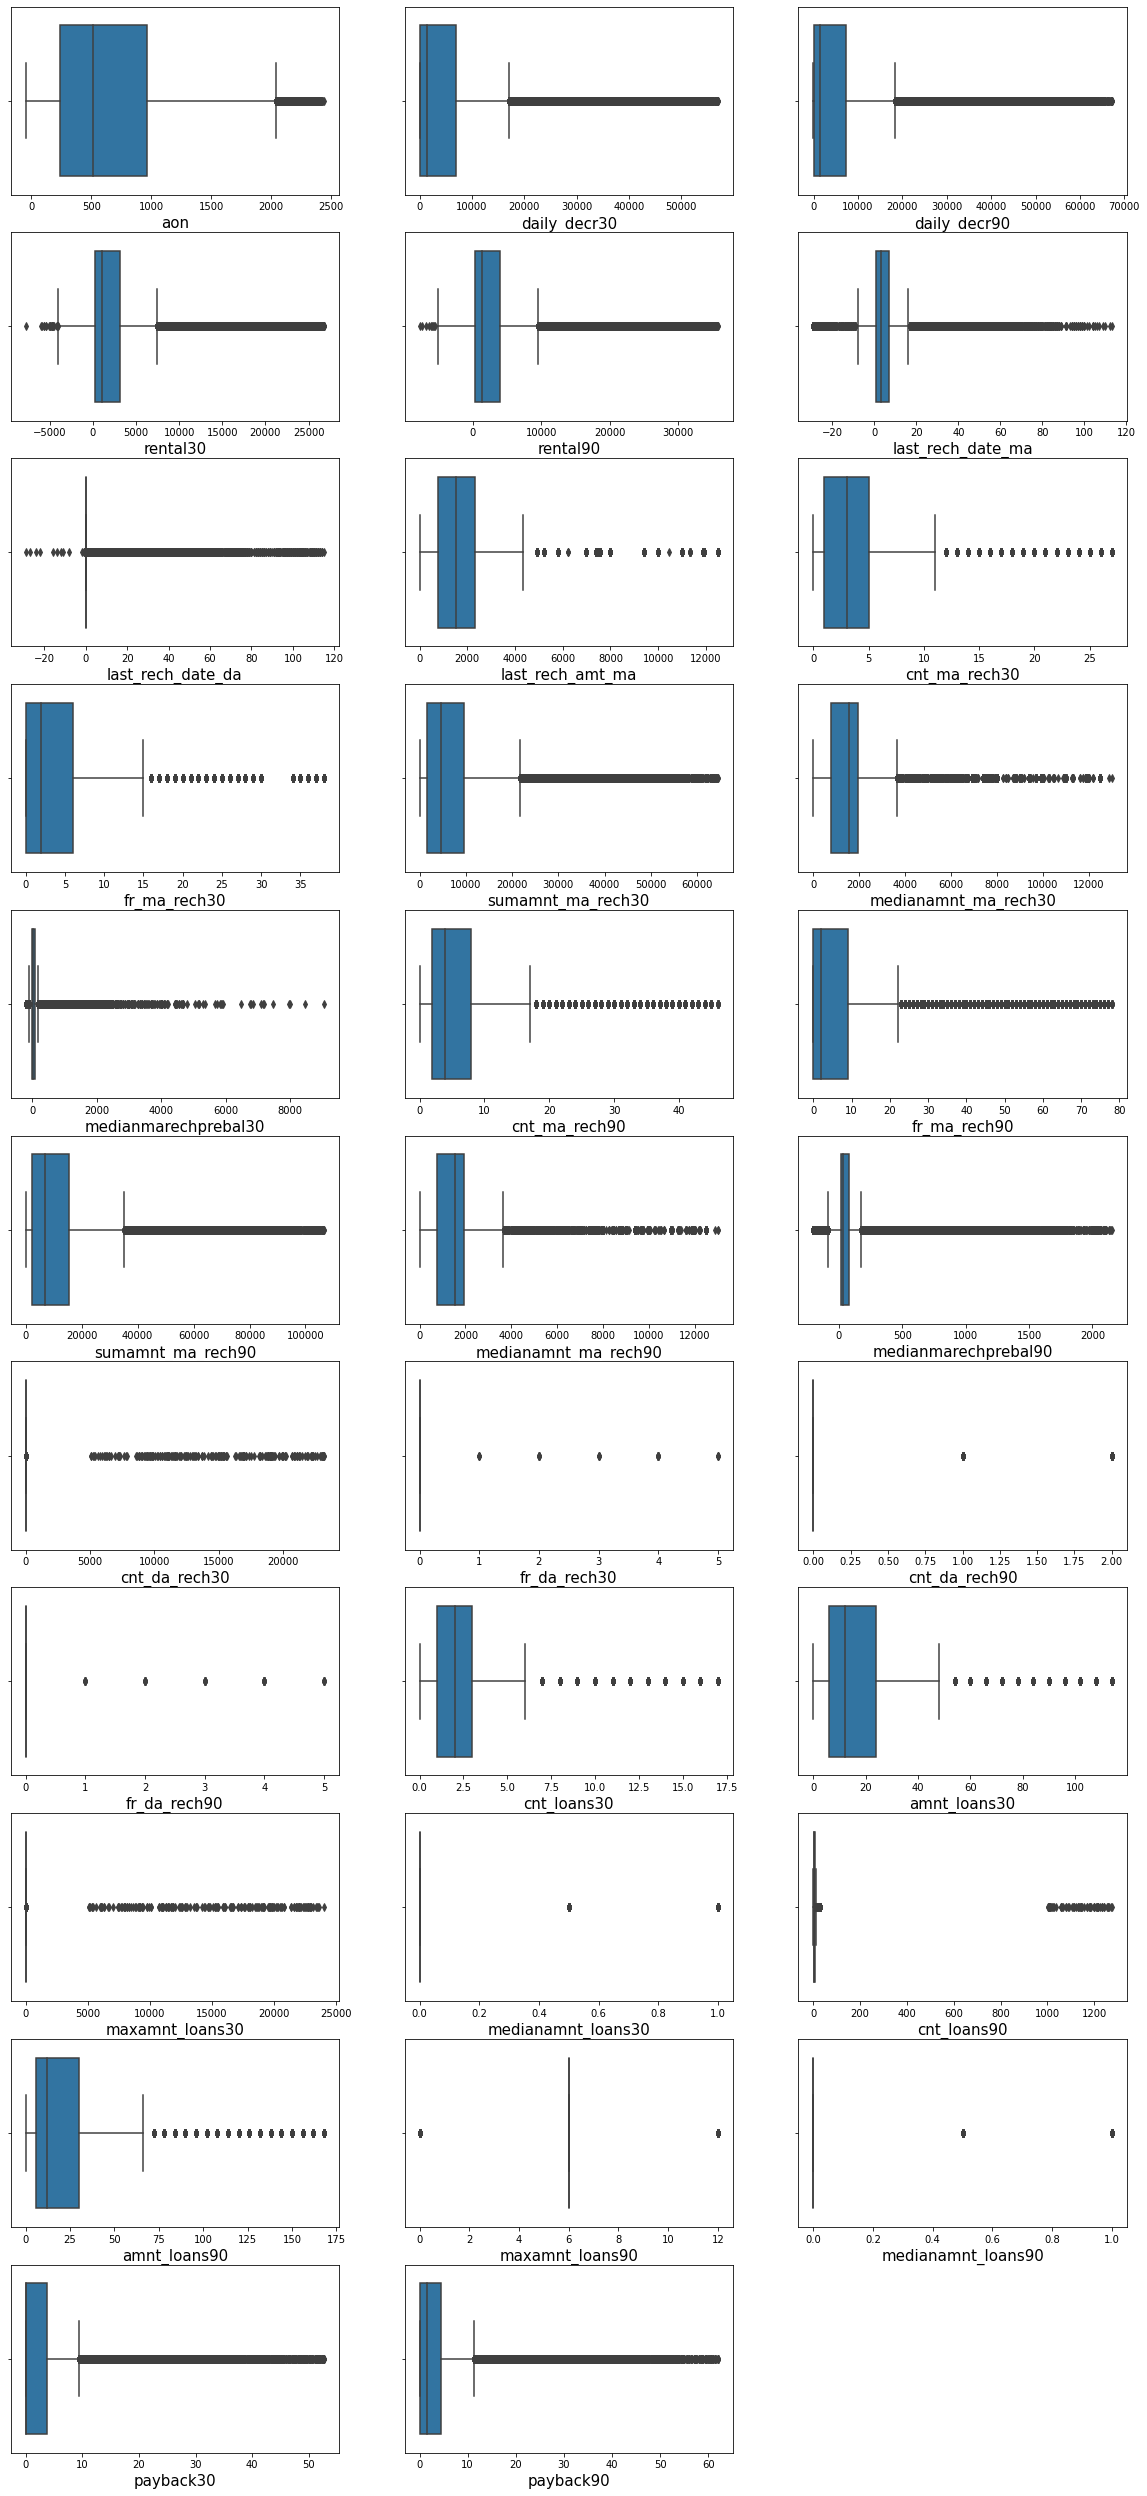

In [68]:
plt.figure(figsize=(20,45))   # here we give row and column wise dimension
plotnumber=1  # initially plotnumber is set to 1
for column in micro_num1:  #  we pass every column of dataframe into for loop
    if plotnumber<=33: # maximmum plotnumber is 3
        plt.subplot(11,3,plotnumber) # we plot all distplot in 1row and in 3 columns
        ax=sns.boxplot(micro_num1[column]) # we plot distribution plot for every column
        plt.xlabel(column,fontsize=15)# assign column name to each x axis
    plotnumber+=1 # plotnumber is incremented by 1
plt.show() # display graph

# Feature Selection Using Heatmap for Continous feature

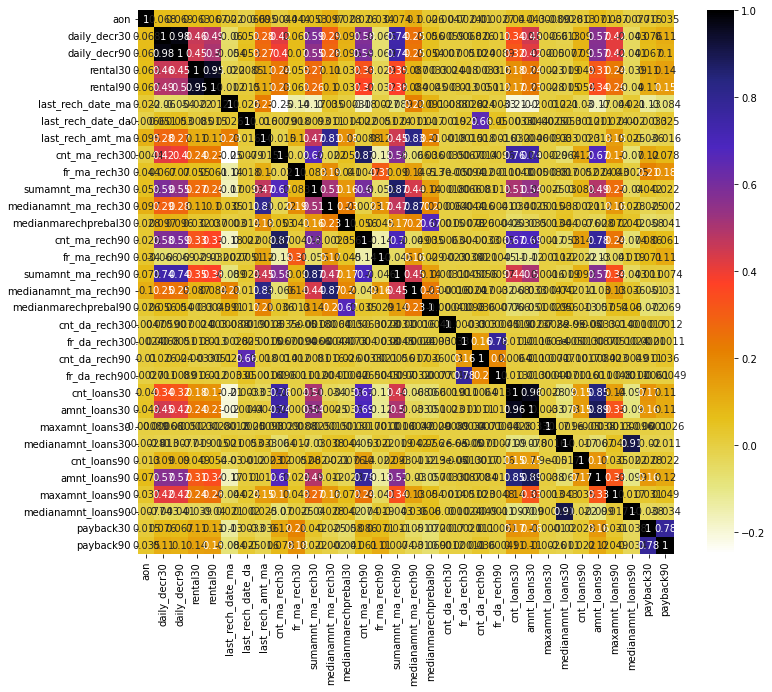

In [69]:
plt.figure(figsize=(12,10))
corr= micro_num1.corr()
sns.heatmap(corr,annot=True,cmap=plt.cm.CMRmap_r)

In [71]:
micro_num1.columns

Index(['aon', 'daily_decr30', 'daily_decr90', 'rental30', 'rental90',
       'last_rech_date_ma', 'last_rech_date_da', 'last_rech_amt_ma',
       'cnt_ma_rech30', 'fr_ma_rech30', 'sumamnt_ma_rech30',
       'medianamnt_ma_rech30', 'medianmarechprebal30', 'cnt_ma_rech90',
       'fr_ma_rech90', 'sumamnt_ma_rech90', 'medianamnt_ma_rech90',
       'medianmarechprebal90', 'cnt_da_rech30', 'fr_da_rech30',
       'cnt_da_rech90', 'fr_da_rech90', 'cnt_loans30', 'amnt_loans30',
       'maxamnt_loans30', 'medianamnt_loans30', 'cnt_loans90', 'amnt_loans90',
       'maxamnt_loans90', 'medianamnt_loans90', 'payback30', 'payback90'],
      dtype='object')

In [72]:
 print(micro_num1[['aon', 'daily_decr30', 'daily_decr90', 'rental30', 'rental90',
       'last_rech_date_ma', 'last_rech_date_da', 'last_rech_amt_ma',
       'cnt_ma_rech30', 'fr_ma_rech30', 'sumamnt_ma_rech30',
       'medianamnt_ma_rech30', 'medianmarechprebal30', 'cnt_ma_rech90',
       'fr_ma_rech90', 'sumamnt_ma_rech90', 'medianamnt_ma_rech90',
       'medianmarechprebal90', 'cnt_da_rech30', 'fr_da_rech30',
       'cnt_da_rech90', 'fr_da_rech90', 'cnt_loans30', 'amnt_loans30',
       'maxamnt_loans30', 'medianamnt_loans30', 'cnt_loans90', 'amnt_loans90',
       'maxamnt_loans90', 'medianamnt_loans90', 'payback30', 'payback90']].corr())

                           aon  daily_decr30  ...  payback30  payback90
aon                   1.000000      0.067517  ...   0.014592   0.034539
daily_decr30          0.067517      1.000000  ...   0.076491   0.107014
daily_decr90          0.069371      0.977384  ...   0.067408   0.100245
rental30              0.062615      0.459953  ...   0.112042   0.139629
rental90              0.066539      0.488181  ...   0.108126   0.149459
last_rech_date_ma     0.021893     -0.059768  ...  -0.128060  -0.083800
last_rech_date_da    -0.006640      0.051308  ...  -0.003302   0.025486
last_rech_amt_ma      0.094882      0.280188  ...  -0.036108  -0.016062
cnt_ma_rech30         0.004441      0.421510  ...   0.119118   0.077851
fr_ma_rech30          0.044038      0.067227  ...   0.209999   0.177509
sumamnt_ma_rech30     0.052971      0.585189  ...   0.042323   0.021831
medianamnt_ma_rech30  0.097093      0.293726  ...  -0.024854  -0.002041
medianmarechprebal30  0.027943      0.097297  ...  -0.058110  -0

In [73]:
micro_num1=micro_num1.drop(columns=['daily_decr30','cnt_ma_rech30','rental90','amnt_loans30','payback90','medianamnt_loans30','cnt_ma_rech90'],axis=1)

In [74]:
micro_num1.shape

(192834, 25)

# Skewness Removal

In [75]:
micro_num1.skew()

aon                      0.947929
daily_decr90             2.529570
rental30                 2.576383
last_rech_date_ma        3.103931
last_rech_date_da        9.964827
last_rech_amt_ma         2.220648
fr_ma_rech30             2.011586
sumamnt_ma_rech30        2.195260
medianamnt_ma_rech30     2.450631
medianmarechprebal30    10.846229
fr_ma_rech90             2.241148
sumamnt_ma_rech90        2.281084
medianamnt_ma_rech90     2.464785
medianmarechprebal90     5.277411
cnt_da_rech30           35.456230
fr_da_rech30            88.248601
cnt_da_rech90            7.424274
fr_da_rech90            68.794539
cnt_loans30              2.006092
maxamnt_loans30         37.740630
cnt_loans90             52.557397
amnt_loans90             2.258849
maxamnt_loans90          1.745465
medianamnt_loans90       4.457242
payback30                3.961404
dtype: float64

In [76]:
micro_num1.skew()

aon                      0.947929
daily_decr90             2.529570
rental30                 2.576383
last_rech_date_ma        3.103931
last_rech_date_da        9.964827
last_rech_amt_ma         2.220648
fr_ma_rech30             2.011586
sumamnt_ma_rech30        2.195260
medianamnt_ma_rech30     2.450631
medianmarechprebal30    10.846229
fr_ma_rech90             2.241148
sumamnt_ma_rech90        2.281084
medianamnt_ma_rech90     2.464785
medianmarechprebal90     5.277411
cnt_da_rech30           35.456230
fr_da_rech30            88.248601
cnt_da_rech90            7.424274
fr_da_rech90            68.794539
cnt_loans30              2.006092
maxamnt_loans30         37.740630
cnt_loans90             52.557397
amnt_loans90             2.258849
maxamnt_loans90          1.745465
medianamnt_loans90       4.457242
payback30                3.961404
dtype: float64

In [77]:
micro_num1['cnt_da_rech90'].dtype

dtype('int64')

In [78]:
#Log Transformation

In [79]:
micro_num1['last_rech_date_ma']=np.cbrt(micro_num1['last_rech_date_ma'])
micro_num1['last_rech_date_da']=np.cbrt(micro_num1['last_rech_date_da'])
micro_num1['medianmarechprebal30']=np.cbrt(micro_num1['medianmarechprebal30'])
micro_num1['medianmarechprebal90']=np.cbrt(micro_num1['medianmarechprebal90'])
micro_num1['cnt_da_rech30']=np.log1p(micro_num1['cnt_da_rech30'])
micro_num1['fr_da_rech30']=np.log1p(micro_num1['fr_da_rech30'])
micro_num1['cnt_da_rech90']=np.log1p(micro_num1['cnt_da_rech90'])
micro_num1['fr_da_rech90']=np.log1p(micro_num1['fr_da_rech90'])
micro_num1['cnt_da_rech90']=np.log1p(micro_num1['cnt_da_rech90'])
micro_num1['maxamnt_loans30']=np.log1p(micro_num1['maxamnt_loans30'])
micro_num1['cnt_loans90']=np.log1p(micro_num1['cnt_loans90'])
micro_num1['medianamnt_loans90']=np.log1p(micro_num1['medianamnt_loans90'])
micro_num1['payback30']=np.log1p(micro_num1['payback30'])



In [80]:
micro_num1.skew()

aon                      0.947929
daily_decr90             2.529570
rental30                 2.576383
last_rech_date_ma       -0.506602
last_rech_date_da        6.991628
last_rech_amt_ma         2.220648
fr_ma_rech30             2.011586
sumamnt_ma_rech30        2.195260
medianamnt_ma_rech30     2.450631
medianmarechprebal30     0.171780
fr_ma_rech90             2.241148
sumamnt_ma_rech90        2.281084
medianamnt_ma_rech90     2.464785
medianmarechprebal90    -0.066949
cnt_da_rech30           28.470288
fr_da_rech30            80.309945
cnt_da_rech90            6.760716
fr_da_rech90            62.266672
cnt_loans30              2.006092
maxamnt_loans30          5.003703
cnt_loans90              0.905456
amnt_loans90             2.258849
maxamnt_loans90          1.745465
medianamnt_loans90       4.257135
payback30                0.756410
dtype: float64

In [81]:
micro_cat.head()

label pcircle       pdate
0      0     UPW  2016-07-20
1      1     UPW  2016-08-10
2      1     UPW  2016-08-19
3      1     UPW  2016-06-06
4      1     UPW  2016-06-22

# Encoding

In [82]:
micro_cat['pcircle']=micro_cat['pcircle'].replace('UPW',0)

In [83]:
micro_cat['pcircle'].value_counts()

0    209593
Name: pcircle, dtype: int64

# Feature Engineering

In [84]:

micro_cat['day'] =pd.DatetimeIndex(micro_cat['pdate']).day
micro_cat['month'] =pd.DatetimeIndex(micro_cat['pdate']).month
micro_cat['year'] =pd.DatetimeIndex(micro_cat['pdate']).year

In [85]:
micro_cat.head()

label  pcircle       pdate  day  month  year
0      0        0  2016-07-20   20      7  2016
1      1        0  2016-08-10   10      8  2016
2      1        0  2016-08-19   19      8  2016
3      1        0  2016-06-06    6      6  2016
4      1        0  2016-06-22   22      6  2016

In [86]:
micro_cat=micro_cat.drop(columns=['pdate'],axis=1)
micro_cat.head()

label  pcircle  day  month  year
0      0        0   20      7  2016
1      1        0   10      8  2016
2      1        0   19      8  2016
3      1        0    6      6  2016
4      1        0   22      6  2016

In [87]:
micro_num1.isna().sum()

aon                     0
daily_decr90            0
rental30                0
last_rech_date_ma       0
last_rech_date_da       0
last_rech_amt_ma        0
fr_ma_rech30            0
sumamnt_ma_rech30       0
medianamnt_ma_rech30    0
medianmarechprebal30    0
fr_ma_rech90            0
sumamnt_ma_rech90       0
medianamnt_ma_rech90    0
medianmarechprebal90    0
cnt_da_rech30           0
fr_da_rech30            0
cnt_da_rech90           0
fr_da_rech90            0
cnt_loans30             0
maxamnt_loans30         0
cnt_loans90             0
amnt_loans90            0
maxamnt_loans90         0
medianamnt_loans90      0
payback30               0
dtype: int64

# Scaling

In [88]:
from sklearn.preprocessing import MinMaxScaler
scaler=MinMaxScaler()
x_scaled=scaler.fit_transform(micro_num1)

micro_num2=pd.DataFrame(x_scaled,columns = micro_num1.columns)# here converted array into dataframe
micro_num2

In [94]:
micro_num2.isna().sum()

aon                     0
daily_decr90            0
rental30                0
last_rech_date_ma       0
last_rech_date_da       0
last_rech_amt_ma        0
fr_ma_rech30            0
sumamnt_ma_rech30       0
medianamnt_ma_rech30    0
medianmarechprebal30    0
fr_ma_rech90            0
sumamnt_ma_rech90       0
medianamnt_ma_rech90    0
medianmarechprebal90    0
cnt_da_rech30           0
fr_da_rech30            0
cnt_da_rech90           0
fr_da_rech90            0
cnt_loans30             0
maxamnt_loans30         0
cnt_loans90             0
amnt_loans90            0
maxamnt_loans90         0
medianamnt_loans90      0
payback30               0
dtype: int64

In [95]:
micro_num3 = pd.concat([micro_num2,micro_cat],axis=1)  # here concate both dataframe after scaling

In [96]:
micro_num3.shape

(209593, 30)

In [97]:
micro_num3.head()

aon  daily_decr90  rental30  ...  day  month  year
0  0.128617      0.046279  0.231570  ...   20      7  2016
1  0.305466      0.181034  0.331960  ...   10      8  2016
2  0.234325      0.021482  0.251236  ...   19      8  2016
3  0.116158      0.001003  0.229814  ...    6      6  2016
4  0.399920      0.002928  0.256985  ...   22      6  2016

[5 rows x 30 columns]

In [98]:
micro_num3.isna().sum()

aon                     16759
daily_decr90            16759
rental30                16759
last_rech_date_ma       16759
last_rech_date_da       16759
last_rech_amt_ma        16759
fr_ma_rech30            16759
sumamnt_ma_rech30       16759
medianamnt_ma_rech30    16759
medianmarechprebal30    16759
fr_ma_rech90            16759
sumamnt_ma_rech90       16759
medianamnt_ma_rech90    16759
medianmarechprebal90    16759
cnt_da_rech30           16759
fr_da_rech30            16759
cnt_da_rech90           16759
fr_da_rech90            16759
cnt_loans30             16759
maxamnt_loans30         16759
cnt_loans90             16759
amnt_loans90            16759
maxamnt_loans90         16759
medianamnt_loans90      16759
payback30               16759
label                       0
pcircle                     0
day                         0
month                       0
year                        0
dtype: int64

In [99]:
micro_num3=micro_num3.dropna(axis=0)

In [100]:
micro_num3.isna().sum()

aon                     0
daily_decr90            0
rental30                0
last_rech_date_ma       0
last_rech_date_da       0
last_rech_amt_ma        0
fr_ma_rech30            0
sumamnt_ma_rech30       0
medianamnt_ma_rech30    0
medianmarechprebal30    0
fr_ma_rech90            0
sumamnt_ma_rech90       0
medianamnt_ma_rech90    0
medianmarechprebal90    0
cnt_da_rech30           0
fr_da_rech30            0
cnt_da_rech90           0
fr_da_rech90            0
cnt_loans30             0
maxamnt_loans30         0
cnt_loans90             0
amnt_loans90            0
maxamnt_loans90         0
medianamnt_loans90      0
payback30               0
label                   0
pcircle                 0
day                     0
month                   0
year                    0
dtype: int64

In [101]:
micro_num3['label'].value_counts()

1    168753
0     24081
Name: label, dtype: int64

In [102]:
micro_num3=micro_num3.drop(columns=['year','pcircle'],axis=1)


In [103]:
#here the problem of Imbalance is present so we Downsampling to get balanced label

In [104]:
x=micro_num3.drop(columns=['label'],axis=1)
y=micro_num3['label']

In [105]:
x.shape

(192834, 27)

In [106]:
from imblearn.under_sampling import NearMiss
NR=NearMiss()
x,y=NR.fit_resample(x,y)


In [107]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report,accuracy_score

In [108]:
#classification score is used to check performance of classification model,classification score give accuracy which is ratio of true predictions divided by total predictions.classification report contains precision,f1 score and accuracy

In [109]:
# finding best random state
from sklearn.tree import DecisionTreeClassifier
maxAccu=0  # initially max accuracy is set to 0
MaxRs=0  # initially Random state is set to 0
for i in range(1,200): # in for loop we pass 1 to 200 number out of which random state is selected
    x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.25,random_state=i) # used train_test_split in for loop
    mod=DecisionTreeClassifier()
    mod.fit(x_train,y_train)  # fit training data of feature and label to model decision tree
    pred=mod.predict(x_test) # predict label by using test features
    acc=accuracy_score(y_test,pred) # genrate accuracy score by comparing test label and predicted label
    if acc> maxAccu:
        maxAccu=acc # assign accuracy score to max accuracy
        MaxRs=i  # the number at which we get maxaccuracy is treated as random state
print('Best Accuracy is',maxAccu,"on Random state",MaxRs)

Best Accuracy is 0.7580765717133129 on Random state 17


In [110]:
#Train test split is used to evaluate the performance of algorithm when we have large data,It divide the data into two set,training and testing phase, training data is used for fitting machine learning model and testing data is used for evaluating model performance

In [111]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.25,random_state=MaxRs)

In [112]:
from sklearn.feature_selection import VarianceThreshold
var_thresh=VarianceThreshold(threshold=0)
var_thresh.fit(x_train)

VarianceThreshold(threshold=0)

In [113]:
#finding non constant features
sum(var_thresh.get_support())

27

In [114]:
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import GradientBoostingClassifier
from xgboost import XGBClassifier

In [115]:
Log_reg=LogisticRegression()
Log_reg.fit(x_train,y_train)
Log_reg_pred=Log_reg.predict(x_test)
Log_reg_accuracy=accuracy_score(y_test,Log_reg_pred)
print('Log_reg_accuracy',Log_reg_accuracy*100)

Log_reg_accuracy 81.5879079810647


In [ ]:
#Logistics Regression is a algorithm used to predict data value by analysing one or more the independant features or variable

In [116]:
DTC=DecisionTreeClassifier()
DTC.fit(x_train,y_train)# fit training data to classifier
DTC_pred=DTC.predict(x_test)# predict output according test data
DTC_accuracy=accuracy_score(y_test,DTC_pred) #here we compared y_test with predicted output
print('DTC_accuracy',DTC_accuracy*100)

DTC_accuracy 75.7827422971514


In [ ]:
#Decision Tree builds model in the form of tree structure,it divide the dataset into smaller and smaller subset, we determine the root node,then split the subsets,repeat the process till all instance have same class

In [117]:
KNC=KNeighborsClassifier()
KNC.fit(x_train,y_train)# fit training data to classifier
KNC_pred=KNC.predict(x_test)# predict output according test data
KNC_accuracy=accuracy_score(y_test,KNC_pred) #here we compared y_test with predicted output
print('KNC_accuracy',KNC_accuracy*100)

KNC_accuracy 76.48035877418819


In [ ]:
#KNN store all cases and classify new model based on distance(Euclidean method),classification done by majority of votes neighbors

In [118]:
svc=SVC()
svc.fit(x_train,y_train)# fit training data to classifier
svc_pred=svc.predict(x_test) #predict output according test data
svc_accuracy=accuracy_score(y_test,svc_pred) #here we compared y_test with predicted output
print('svc_accuracy',svc_accuracy*100)

svc_accuracy 79.31234947263516


In [ ]:
#SVC is effective when number of dimensions are greater than number of samples,it uses subset of training points(support vector) and hyperplane to give classification output

In [119]:
RFC=RandomForestClassifier()
RFC.fit(x_train,y_train)# fit training data to classifier
RFC_pred=RFC.predict(x_test) #predict label according test feature
RFC_accuracy=accuracy_score(y_test,RFC_pred)#here we compared test label with predicted label
print('RFC_accuracy',RFC_accuracy*100)

RFC_accuracy 83.85516153143426


In [120]:
#RFC is ensemble algorithm which combines more than one algorithm of same or different kind.Random Forest gives outcome based on predictions of number of models by taking mean of output from various trees

In [121]:
GBC=GradientBoostingClassifier()
GBC.fit(x_train,y_train)# fit training data to classifier
GBC_pred=GBC.predict(x_test) #predict label according test feature
GBC_accuracy=accuracy_score(y_test,GBC_pred)#here we compared test label with predicted label
print('GBC_accuracy',GBC_accuracy*100)

GBC_accuracy 83.7388921185948


In [ ]:
#Gradient boosting is ensemble algorithm it involves building a strong model by using collection of weaker models.It combine many weak models and make strong predictive model

In [122]:
XBC=XGBClassifier(eval_metric='mlogloss')
XBC.fit(x_train,y_train)# fit training data to classifier
XBC_pred=XBC.predict(x_test) #predict label according test feature
XBC_accuracy=accuracy_score(y_test,XBC_pred)#here we compared test label with predicted label
print('XBC_accuracy',XBC_accuracy*100)

XBC_accuracy 83.72228220247487


In [123]:
from sklearn.model_selection import cross_val_score

In [124]:
#CV is a technique used to check whether model is overfitted or not, if model accuracy is high, then there is chances of model is overfitted.We use CV score for every model,for this we require model,features and labels, cv is cross validation spliting strategy.finally it take mean of all iteration and return cv score

In [125]:
Log_reg_cv_score=cross_val_score(Log_reg,x,y,cv=5).mean() # we pass Logistic regression model,feature,target and cv=5 means 4 set for training and 1 for testing
Log_reg_cv_score*100

79.52922914655566

In [126]:
DTC_CV_score=cross_val_score(DTC,x,y,cv=5).mean() # we pass Decision Tree classifier model,feature,target and cv=5 means 4 set for training and 1 for testing
DTC_CV_score*100

65.15742017766308

In [127]:
KNC_CV_score=cross_val_score(KNC,x,y,cv=5).mean() # we pass model K neighbors Classifier,feature,target and cv=5 means 4 set for training and 1 for testing
KNC_CV_score*100

63.60035629013362

In [128]:
svc_CV_score=cross_val_score(svc,x,y,cv=5).mean() # we pass model Support Vector Classifier,feature,target and cv=5 means 4 set for training and 1 for testing
svc_CV_score*100

78.8088114103202

In [133]:
RFC_CV_score=cross_val_score(RFC,x,y,cv=5).mean() # we pass model Random Forest Classifier,feature,target and cv=5 means 4 set for training and 1 for testing
RFC_CV_score*100

70.96289018783371

In [135]:
GBC_CV_score=cross_val_score(GBC,x,y,cv=5).mean() # we pass model Gradient boosting Classifier,feature,target and cv=5 means 4 set for training and 1 for testing
GBC_CV_score*100

80.88508541720338

In [ ]:
XBC_CV_score=cross_val_score(XBC,x,y,cv=5).mean() # we pass model Extreme Gradient boosting,feature,target and cv=5 means 4 set for training and 1 for testing
XBC_CV_score*100

In [132]:
Logistic_regression_diff=Log_reg_accuracy*100-Log_reg_cv_score*100
print('Logistic_regression_diff',Logistic_regression_diff)
DTC_diff=DTC_accuracy*100-DTC_CV_score*100
print('DTC_diff',DTC_diff)
KNC_diff=KNC_accuracy*100-KNC_CV_score*100
print("KNC_diff",KNC_diff)
svc_diff=svc_accuracy*100-svc_CV_score*100
print("svc_diff",svc_diff)
RFC_diff=RFC_accuracy*100-RFC_CV_score*100
print("RFC_diff",RFC_diff)
GBC_diff=GBC_accuracy*100-GBC_CV_score*100
print("GBC_diff",GBC_diff)
XBC_diff=XBC_accuracy*100-XBC_CV_score*100
print("XBC_diff",XBC_diff)

Logistic_regression_diff 2.0586788345090383
DTC_diff 10.625322119488317
KNC_diff 12.880002484054572
svc_diff 0.5035380623149592
RFC_diff 12.877740555366728
GBC_diff 2.8517305049832373
XBC_diff 2.882854999887414
Logistic_regression_diff 2.0586788345090383
DTC_diff 10.625322119488317
KNC_diff 12.880002484054572
svc_diff 0.5035380623149592
RFC_diff 12.877740555366728
GBC_diff 2.8517305049832373
XBC_diff 2.882854999887414


In [ ]:
#In above line, we take difference of accuracy score of each model with cross vaidation score of that model, we multiply the differnce by 100 to get percentage values

In [136]:
print("Log_reg_accuracy",Log_reg_accuracy)
print("Log_reg_cv_score", Log_reg_cv_score)
print("Logistic_regression_diff", Logistic_regression_diff)
print("-------------------------------------------------------------------------------------------")
print("DTC_accuracy",DTC_accuracy)
print("DTC_CV_score",DTC_CV_score)
print("DTC_diff",DTC_diff)
print("-------------------------------------------------------------------------------------------")
print("KNC_accuracy",KNC_accuracy)
print("KNC_CV_score", KNC_CV_score)
print("KNC_diff",KNC_diff)

print("-------------------------------------------------------------------------------------------")
print("svc_accuracy",svc_accuracy)
print("svc_CV_score",svc_CV_score)
print("svc_diff", svc_diff)
print("-------------------------------------------------------------------------------------------")

print("RFC_accuracy",RFC_accuracy)
print("RFC_CV_score",RFC_CV_score)
print("RFC_diff",RFC_diff)

print("-------------------------------------------------------------------------------------------")

print("GBC_accuracy",GBC_accuracy)
print("GBC_CV_score",GBC_CV_score) 
print("GBC_diff",GBC_diff)

print("-------------------------------------------------------------------------------------------")

print("XBC_accuracy",XBC_accuracy)
print("XBC_CV_score",XBC_CV_score) 
print("XBC_diff",XBC_diff)

Log_reg_accuracy 0.815879079810647
Log_reg_cv_score 0.7952922914655567
Logistic_regression_diff 2.0586788345090383
-------------------------------------------------------------------------------------------
DTC_accuracy 0.757827422971514
DTC_CV_score 0.6515742017766308
DTC_diff 10.625322119488317
-------------------------------------------------------------------------------------------
KNC_accuracy 0.764803587741882
KNC_CV_score 0.6360035629013362
KNC_diff 12.880002484054572
-------------------------------------------------------------------------------------------
svc_accuracy 0.7931234947263517
svc_CV_score 0.788088114103202
svc_diff 0.5035380623149592
-------------------------------------------------------------------------------------------
RFC_accuracy 0.8385516153143426
RFC_CV_score 0.709628901878337
RFC_diff 12.877740555366728
-------------------------------------------------------------------------------------------
GBC_accuracy 0.837388921185948
GBC_CV_score 0.808850854172033

In [ ]:
#Here we get Accuracy ,CV score and Difference between them,for Extreme Gradient Boosting & Gradient Boosting Classifier difference is less as compared to other algorithm. so we will prefer hyperparameter tuning for  Gradient Boosting Classifier and  Extreme Gradient Boosting.

In [137]:
from sklearn.model_selection import RandomizedSearchCV

In [ ]:
#RandomizedsearchCV is parameter tuning approach which build and evaluate the model performance based on best parameters, we pass parameters of only those model which has less difference between accuracy and cv score. after passing the best parameter we can get best and authenticated accuracy which is not overfitted also

In [138]:
#parameter for Extreme Gradient Boosting

In [139]:
params={
       'max_features':['auto','sqrt','log2'],
       'max_depth':[4,5,6],
       'gamma':[0,1,2,3],
       'min_child_weight':[1,2,3,4],
     'learning_rate':[0.1,0.3,0.5,0.8]}

In [ ]:
Rand_XGB=RandomizedSearchCV(XGBClassifier(eval_metric='mlogloss'),param_distributions=params,cv=5)
Rand_XGB.fit(x_train,y_train)
Rand_XGB.best_params_

In [141]:
Final_XGB=XGBClassifier(eval_metric='mlogloss',max_features='sqrt',gamma=3,learning_rate=0.1 ,max_depth=5,min_child_weight=3)
Final_XGB.fit(x_train,y_train)

final_pred=Final_XGB.predict(x_test)
final_score=accuracy_score(y_test,final_pred)
print(final_score*100)

84.24549456025247


In [ ]:
# Now we will do Hyperparameter tuning for Gradient Boosting Classifer

In [142]:
params2={
       'max_features':['auto','sqrt','log2'],
       'max_depth':[4,5,6],
       'min_samples_split':[2,4,6],
     'learning_rate':[0.1,0.3,0.5,0.8]}

In [143]:
Rand_GBC=RandomizedSearchCV(GradientBoostingClassifier(),param_distributions=params2,cv=5)
Rand_GBC.fit(x_train,y_train)
Rand_GBC.best_params_

{'learning_rate': 0.1,
 'max_depth': 6,
 'max_features': 'sqrt',
 'min_samples_split': 4}

In [145]:
Final_GBC=GradientBoostingClassifier(max_features='sqrt',max_depth=6,min_samples_split=4 ,learning_rate=0.1,)
Final_GBC.fit(x_train,y_train)

final_pred2=Final_GBC.predict(x_test)
final_score2=accuracy_score(y_test,final_pred2)
print(final_score2*100)

84.50294826011128


In [ ]:
# here we can see that accuracy for XG boost is higher than Gradient boosting, so we will plot confusion matrix for XG boost

In [146]:
from sklearn.metrics import confusion_matrix
cfm=confusion_matrix(y_test,final_pred)
cfm

array([[4524, 1443],
       [ 454, 5620]])

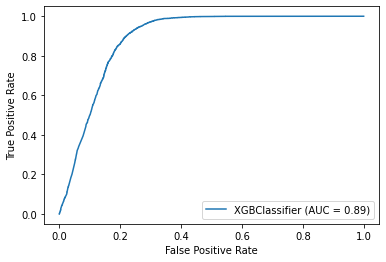

In [147]:
from sklearn.metrics import plot_roc_curve
disp=plot_roc_curve(Final_XGB,x_test,y_test)

In [ ]:
#This curve helps us to choose the best model amongst the models for which we have plotted ROC curve.The best model is one which cover the maximum area under it.our Extreme Gradient Boosting classifier ROC curve cover almost more than 80 % area under it.

In [148]:
import joblib
joblib.dump(Final_XGB,"Micro Credit loan.pkl")

['Micro Credit loan.pkl']